In [1]:
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',2000)
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"]=13,8

In [2]:
cpi = pd.read_csv('CPIAUCSL.csv')
cpi.DATE = pd.to_datetime(cpi.DATE, format ='%Y-%m-%d')
cpi.set_index("DATE", inplace = True)
cpi_year =cpi.resample("A").mean()
cpi = cpi_year.reset_index()
cpi["year"] = cpi.DATE.map(lambda x:x.year)
cpi.drop("DATE",axis = 1,inplace = True)
cpi.set_index('year',inplace = True)
cpi.head()
cpi["multiplier"] = cpi.VALUE.map(lambda x:cpi.VALUE[2016]/x)
cpi['multiplier'][2000]

1.381665779412476

In [3]:
batting = pd.read_csv("baseballdatabank-master/core/Batting.csv")
print(len(batting))
salary = pd.read_csv("baseballdatabank-master/core/Salaries.csv")
print(len(salary))
position = pd.read_csv("baseballdatabank-master/core/Appearances.csv")
player_data = pd.merge(batting,salary)
print(len(player_data))
player_data = pd.merge(player_data,position)
print(len(player_data))
player_data["salary_2016"] = player_data.apply(lambda x:x["salary"] * cpi.multiplier[x['yearID']], axis = 1)
player_data.dropna(inplace = True)
print(len(player_data))
player_data.head()

101332
25575
24626
24510
22180


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary_2016
1,agostju01,1985,1,CHA,AL,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147500,54.0,0.0,4,54.0,54,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.261331e+05
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,3.0,6.0,21.0,1.0,0.0,22.0,26.0,5.0,6.0,4.0,3.0,7.0,237000,91.0,42.0,91,82.0,0,0,0,17,7,60,0,0,0,0,0.0,11.0,9.0,5.240240e+05
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,750000,23.0,1.0,23,23.0,23,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.658304e+06
5,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,0.0,6.0,29.0,10.0,7.0,22.0,61.0,0.0,1.0,4.0,3.0,6.0,255000,88.0,61.0,88,79.0,0,0,7,0,7,43,26,6,0,32,0.0,15.0,6.0,5.638233e+05
6,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,250500,57.0,0.0,57,57.0,57,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,5.538735e+05


In [4]:
player_data['OBPnum'] = player_data.H + player_data.BB + player_data.HBP
player_data['OBPden'] = player_data.AB + player_data.HBP + player_data.BB + player_data.SF
player_data['OBP'] = player_data.OBPnum / player_data.OBPden
player_data.dropna(inplace = True)
print(len(player_data))
player_data.head()


19164


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary_2016,OBPnum,OBPden,OBP
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,3.0,6.0,21.0,1.0,0.0,22.0,26.0,5.0,6.0,4.0,3.0,7.0,237000,91.0,42.0,91,82.0,0,0,0,17,7,60,0,0,0,0,0.0,11.0,9.0,5.240240e+05,74.0,196.0,0.377551
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,750000,23.0,1.0,23,23.0,23,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.658304e+06,0.0,2.0,0.000000
5,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,0.0,6.0,29.0,10.0,7.0,22.0,61.0,0.0,1.0,4.0,3.0,6.0,255000,88.0,61.0,88,79.0,0,0,7,0,7,43,26,6,0,32,0.0,15.0,6.0,5.638233e+05,89.0,270.0,0.329630
6,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,250500,57.0,0.0,57,57.0,57,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,5.538735e+05,0.0,4.0,0.000000
7,andujjo01,1985,1,SLN,NL,38,94.0,2.0,10.0,2.0,0.0,0.0,8.0,3.0,1.0,5.0,50.0,0.0,0.0,7.0,0.0,2.0,1030000,38.0,38.0,38,38.0,38,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.277404e+06,15.0,99.0,0.151515


In [5]:
player_data.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary_2016,OBPnum,OBPden,OBP
count,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000
mean,2000.410457,1.006262,77.115738,221.263619,29.884732,58.418441,11.277656,1.245356,6.533866,28.517481,4.275047,1.831872,21.703507,41.058025,1.854415,1.979284,2.120278,1.878835,5.001409,2.225586e+06,77.328898,58.994991,74.844918,68.691244,10.758088,7.334481,7.613442,7.298215,7.409205,7.278491,7.667502,7.299990,7.555469,21.851075,3.273951,6.852901,0.999896,2.756958e+06,82.101231,246.825245,0.269668
std,8.527547,0.083387,48.645591,207.587810,32.334496,59.608632,12.230030,2.072001,9.330042,32.098152,8.614750,3.017235,25.024911,38.904189,3.660883,3.123848,3.093085,2.434710,5.649696,3.592213e+06,48.637244,52.664308,51.307083,47.506073,18.821524,24.828111,26.801168,26.256889,26.130365,27.383594,23.878691,26.254768,25.197482,43.383265,14.034845,11.633312,2.695819,4.057592e+06,83.954620,233.199140,0.140685
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,1994.000000,1.000000,33.000000,28.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+05,33.000000,12.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.023020e+05,5.000000,30.000000,0.208333
50%,2000.000000,1.000000,70.000000,156.000000,18.000000,37.000000,7.000000,0.000000,2.000000,16.000000,1.000000,0.000000,13.000000,29.000000,0.000000,1.000000,1.000000,1.000000,3.000000,6.000000e+05,70.000000,39.000000,69.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,9.029660e+05,53.000000,173.000000,0.305263
75%,2008.000000,1.000000,122.000000,403.000000,52.000000,106.000000,20.000000,2.000000,10.000000,48.000000,4.000000,3.000000,35.000000,66.000000,2.000000,3.000000,3.000000,3.000000,8.000000,2.550000e+06,123.000000,106.000000,123.000000,110.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,8.000000,1.000000,3.459646e+06,149.000000,449.000000,0.345110
max,2015.000000,3.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.000000,3.300000e+07,163.000000,163.000000,163.000000,163.000000,94.000000,151.000000,162.000000,162.000000,162.000000,163.000000,162.000000,162.000000,162.000000,162.000000,153.000000,95.000000,44.000000,3.659071e+07,376.000000,778.000000,1.000000


In [6]:
positions = ['p','c','1b','2b','3b','ss','lf','cf','rf']
for pos in positions:
    player_data[pos] = player_data["G_"+pos] / player_data["G_defense"]
player_data.dropna(inplace = True)
player_data.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr,salary_2016,OBPnum,OBPden,OBP,p,c,1b,2b,3b,ss,lf,cf,rf
2,aguaylu01,1985,1,PHI,NL,91,165.0,27.0,46.0,7.0,3.0,6.0,21.0,1.0,0.0,22.0,26.0,5.0,6.0,4.0,3.0,7.0,237000,91.0,42.0,91,82.0,0,0,0,17,7,60,0,0,0,0,0.0,11.0,9.0,5.240240e+05,74.0,196.0,0.377551,0.0,0.0,0.000000,0.207317,0.085366,0.731707,0.000000,0.000000,0.0
4,allenne01,1985,1,SLN,NL,23,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,750000,23.0,1.0,23,23.0,23,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.658304e+06,0.0,2.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,almonbi01,1985,1,PIT,NL,88,244.0,33.0,66.0,17.0,0.0,6.0,29.0,10.0,7.0,22.0,61.0,0.0,1.0,4.0,3.0,6.0,255000,88.0,61.0,88,79.0,0,0,7,0,7,43,26,6,0,32,0.0,15.0,6.0,5.638233e+05,89.0,270.0,0.329630,0.0,0.0,0.088608,0.000000,0.088608,0.544304,0.329114,0.075949,0.0
6,anderla02,1985,1,PHI,NL,57,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,250500,57.0,0.0,57,57.0,57,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,5.538735e+05,0.0,4.0,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,andujjo01,1985,1,SLN,NL,38,94.0,2.0,10.0,2.0,0.0,0.0,8.0,3.0,1.0,5.0,50.0,0.0,0.0,7.0,0.0,2.0,1030000,38.0,38.0,38,38.0,38,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.277404e+06,15.0,99.0,0.151515,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [7]:
recent_player_data = player_data[player_data.yearID >2012]
recent_player_data = recent_player_data.copy()
recent_player_data.drop(['teamID','lgID',"G"],inplace = True, axis =1)
recent_player_data.drop(["R",'H','2B','3B','HR','RBI','SB','CS','BB','SO','IBB','HBP','SH',"G_pr"],inplace = True, axis = 1)
recent_player_data.drop(["SF","GIDP",'salary','G_all','GS','G_batting','G_defense',"G_p","OBPnum","OBPden"],inplace = True, axis =1)
recent_player_data.drop(['G_c','G_1b','G_2b',"G_3b",'G_ss','G_lf','G_cf','G_rf',"G_of","G_dh","G_ph"],inplace = True, axis =1)
print(len(recent_player_data))

1780


In [24]:
player_avg = recent_player_data.groupby("playerID").mean()
players_2015 = recent_player_data[recent_player_data.yearID == 2015]
players_2015 = players_2015.copy()
players_2015.drop(['stint','yearID','OBP','p','c','1b','2b','3b','ss','lf','rf','cf'],inplace = True, axis =1)
players_2015 = players_2015.copy()
player_stats = player_avg.copy()
player_stats.drop(['yearID','stint','AB','salary_2016'],inplace = True, axis =1)
player_stats.reset_index(inplace = True)
players = pd.merge(player_stats,players_2015)
players["obp_per_dollar"]= players["OBP"]/players["salary_2016"]
players.head()

,playerID,OBP,p,c,1b,2b,3b,ss,lf,cf,rf,AB,salary_2016,obp_per_dollar
0,abreujo02,0.364971,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,613.0,8.699501e+06,4.195310e-08
1,ackledu01,0.293964,0.0,0.0,0.018018,0.163379,0.0,0.0,0.632189,0.238758,0.008439,186.0,2.610051e+06,1.126277e-07
2,adamsau01,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,5.096626e+05,0.000000e+00
3,adamsma01,0.312162,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,175.0,5.360643e+05,5.823214e-07
4,affelje01,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.0,6.023195e+06,0.000000e+00


In [25]:
len(players)

609

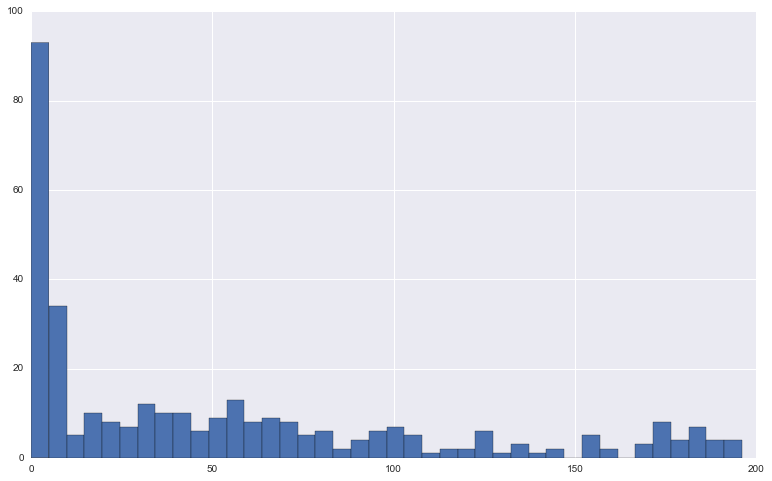

In [17]:
players.AB[players.AB < 200].hist(bins = 40)

(0, 1)

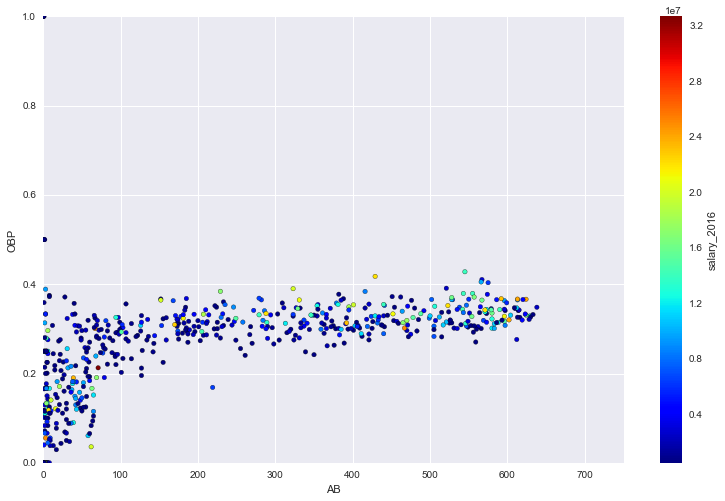

In [18]:
obp_v_ab = players.plot(kind="scatter", x="AB", y="OBP", c="salary_2016", colormap = "jet", sharex = False)
obp_v_ab.set_xlim(0,750)
obp_v_ab.set_ylim(0,1)


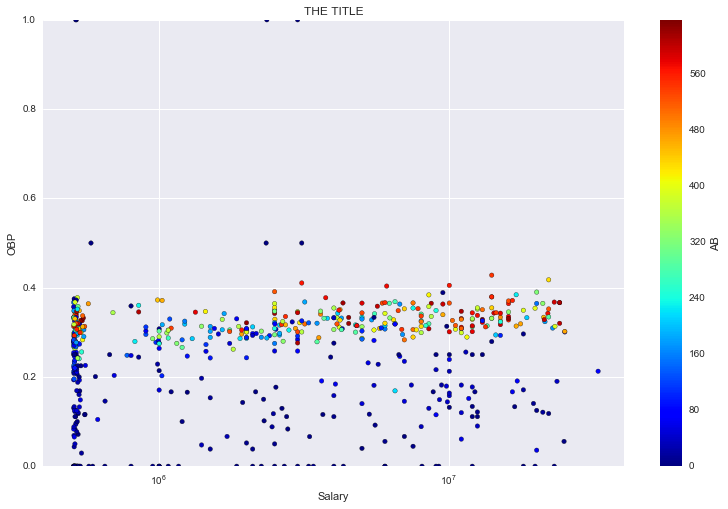

In [19]:
obp_v_salary_all = players.plot(kind="scatter", x="salary_2016", y="OBP", c="AB", colormap = "jet", sharex = False)
obp_v_salary_all.set_xlabel("Salary")
obp_v_salary_all.set_xscale("log")
obp_v_salary_all.set_xlim(400000,40000000)
obp_v_salary_all.set_ylim(0,1)
obp_v_salary_all.set_title("THE TITLE")

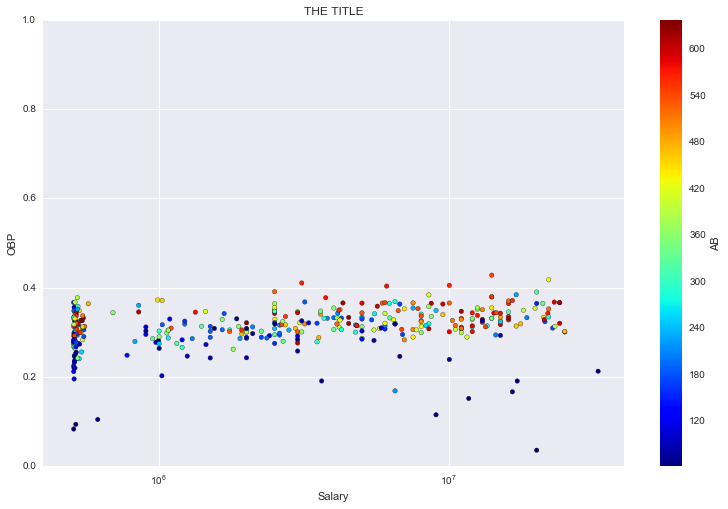

In [21]:
the_plot = players[players.AB>60].plot(kind="scatter", x="salary_2016", y="OBP", c="AB", colormap = "jet", sharex = False)
the_plot.set_xlabel("Salary")
the_plot.set_xscale("log")
the_plot.set_xlim(400000,40000000)
the_plot.set_ylim(0,1)
the_plot.set_title("THE TITLE")

(400000, 40000000)

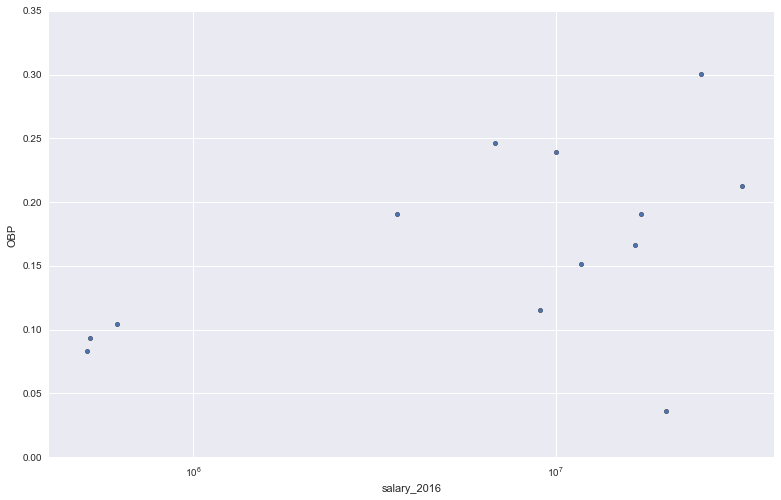

In [22]:
pitcher_data = players[players['p']>.25]
pitcher_plot = pitcher_data[pitcher_data.AB>60].plot(kind='scatter', x='salary_2016',y='OBP')
pitcher_plot.set_xscale("log")
pitcher_plot.set_xlim(400000,40000000)

(400000, 40000000)

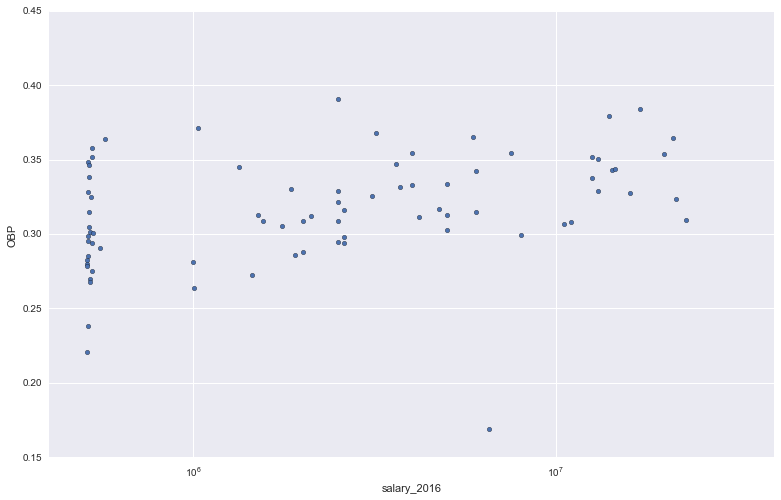

In [23]:
left_field_data = players[players['lf']>.25]
lf_plot = left_field_data[left_field_data.AB>60].plot(kind='scatter', x='salary_2016',y='OBP')
lf_plot.set_xscale("log")
lf_plot.set_xlim(400000,40000000)

(0, 1e-06)

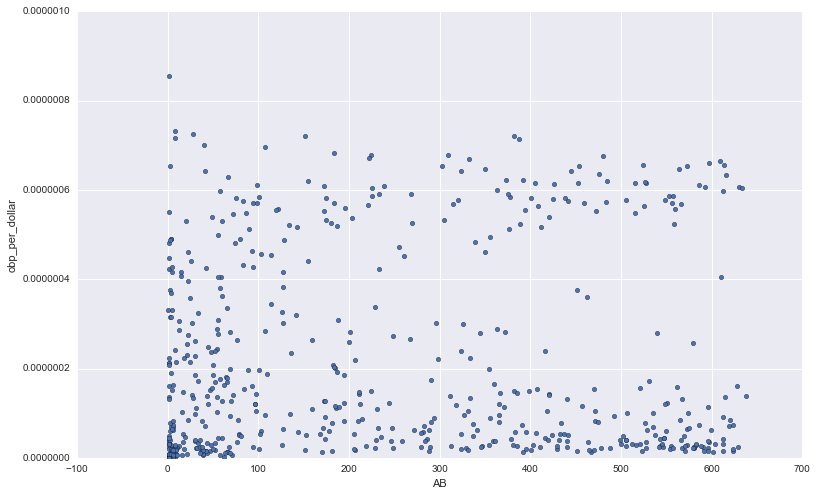

In [31]:
this_plot = players.plot(kind = 'scatter', x ="AB", y="obp_per_dollar")
this_plot.set_ylim(0,.000001)

In [50]:
pitchers = players[players.p >= .25]
pitchers = pitchers[pitchers.AB > 50]
pitchers.sort_values('obp_per_dollar', ascending = False)
pitcher = pitchers.[pitchers.obp_per_dollar.idxmax(axis = 1)]

IndexError: index 342 is out of bounds for axis 0 with size 27